<a href="https://colab.research.google.com/github/sammed97/Airbnb-Data-Analysis/blob/main/Individual_Notebook_EDA_Sammed_Majalekar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SUMMARY**

# **Introduction**

## **Brief introduction of AirBnb-** 
Airbnb, Inc. is an **American company** that operates an online marketplace for **lodging, primarily homestays for vacation rentals, and tourism activities**. Based in San Francisco, California, the platform is accessible via website and mobile app. **Airbnb does not own any of the listed properties**; instead, it profits by receiving commission from each booking. The company was **founded in 2008 by Brian Chesky, Nathan Blecharczyk and Joe Gebbia**. Airbnb is a shortened version of its original name-
### **Air Bed and Breakfast**


Isn't it a cool idea at that time, means you own nothing but still you have the market. **Airbnb** just provided a platform for both owner and customer.


Now We got a overall idea of airbnb business now we can think about out our problem statement and dataset.

# **Objective**


**Our objective for this problem-**
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?

These four questions will be the main findings and apart from this we will explore as much as we can

**Steps we will follow-**
1. Loading and Understand the data
2. Cleaning the data
3. Exploring and visualizing data
4. conclusion 

For this project we are using google colab notebook.

**Data we are using-**
we are using Airbnb NYC 2019 data in '.csv' format and the data is for New York city.

In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Pandas** and **Numpy** libraries are used for **data analysis.**

**Seaborn** and **Matplotlib** libraries are used for **visualization of the data**.

Lets import the drive from where we are going import our dataset file.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Okay ! Now we will define the file path from drive and then we also define our datafram named  **'df'** 

In [3]:
# defining the data path and then reading the same 
file_path= '/content/drive/MyDrive/Colab Notebooks/M1/EDA Capstone project/AirBnB Bookings Analysis/Airbnb NYC 2019.csv'
df=pd.read_csv(file_path)

## **Understanding the Data**

Now we will check the first 5 rows of our dataset

In [ ]:
# We will use built in function 'head'
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Now last 5 rows of our dataset

In [ ]:
# We will use built in function 'tail'
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


we will try to get first 10 rows and last 10 rows in one line code.

In [ ]:
# we will use concat to concatenate both dataframes.
pd.concat([df.head(10), df.tail(10)])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


Let's dive in our dataset now....

In [ ]:
#using 'info' to get the concise summary of our dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# we will check the shape of our dataset using function 'shape'.
df.shape

(48895, 16)

Okay we have **48895 records** and **16 features**, from which we will check for null values and then drop the unwanted records and features as per our requirement.

We will explore the details of numerical columns.

In [ ]:
#We will use 'describe' function to explore numerical columns.
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


We will explore our column names.

In [ ]:
# using 'columns' function we will explore the column names.
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# we will now check for the duplicates in our dataframe using 'duplicated' method.
df.duplicated().sum()

0

Its good that we dont have any duplicated values in our dataframe.
We will look for unique values.

In [ ]:
# lets check for unique values in all columns of our dataset.
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

**let's elaborate column names**

---


*   **id-** unique id for every record

*   **name-** name of the host listing

*   **host_id-** unique id given to the host

*   **host_name -** name of the host(owner)

*   **neighbourhood_group-** it could be a city/location

*   **neighbourhood-** particular area in respective neighbourhood group

*   **latitde-**  horizantal co-ordinates for respective host

*   **longitude-** vertical co-ordinates for respective host
*   **room_type -** Type of room


*   **price-** price charged by host


*   **minimum_nights-** it is the minimum nights for which booking should be done


*   **number_of_reviews-** total reviews given to the host


*   **last_review-** last review given by a customer to the host.


*   **reviews_per_month-** its average reviews given by customer to the host per month


*   **calculated_host_listings_count-** total listing count of a particular host.


*   **availability_365-** host available in a year given in number of days.











In [ ]:
# checking for type of data of every column.
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**Checking for Missing Values**

checking for null values in our dataframe.

In [4]:
# using 'isnull' function we will check for total count of null values in every column.
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

As we can see that we have **16** null values in **'name'** column, **21** null values in **'host_name'** and **10052** null values each in **'last_review'** and **'reviews_per_month'**.

In [5]:
# looking for zero's in our dataframe.
(df==0).sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                11
minimum_nights                        0
number_of_reviews                 10052
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                  17533
dtype: int64

## **Cleaning the Data**

In [6]:
# Now we will fill the 'name' column null values with 'No Name'.
df['name'].fillna('No Name',inplace=True)

In [7]:
# checking that our code works properly or not.
df.name.isnull().sum()

0

In [8]:
# filling the null values in colum 'host_name' with 'No Host Name'.
df['host_name'].fillna('No Host Name',inplace=True)

In [9]:
df.host_name.isnull().sum()

0

In [10]:
# checking for any column left with null/missing values. 
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

filling the null values.

In [11]:
# filling the null values with '0' using 'fillna' function.
df['reviews_per_month'].fillna(0,inplace=True)

Now dropping unwanted columns.

In [12]:
# we are using 'drop' function.
df.drop(['id','last_review'],axis=1,inplace=True)

Now after dropping columns we will check for the shape of dataframe.

In [ ]:
df.shape

(48895, 14)

We have now 48895 records with 14 features.

In [13]:
# checking for any column left with null/missing values. 
df.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

We will check the columns containing values assigned to zero.

In [14]:
(df==0).sum()

name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                11
minimum_nights                        0
number_of_reviews                 10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                  17533
dtype: int64

We will drop the records which contains entry of price as '0'.

In [15]:
# using for loop and 'drop' function.
for val in range(len(df)):
  if df.price[val]==0:
    df.drop(val,axis=0,inplace=True)

In [16]:
df.shape

(48884, 14)

In [17]:
#checking for zeros in 'reviews_per_month' column.
(df['reviews_per_month']==0).sum()

10051

 **Handling Outlires**

Now we will see for the outliers in price column by plotting the box plot.

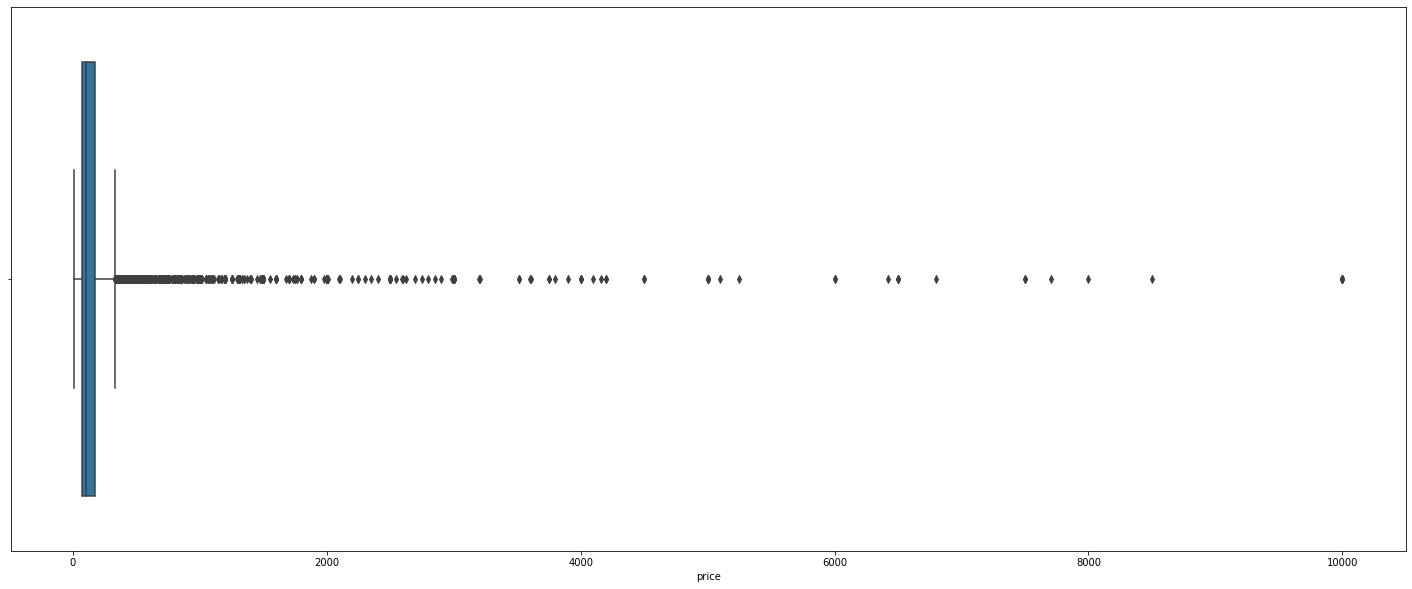

In [ ]:
# checking for outliers in price column using boxplot.
plt.figure(figsize=(25,10))
sns.boxplot(x=df['price'])

from above graph we can set 500 as the upper limit and out of that all values are outliers.

We will define a new set which is according to price column, it contains values under 500.

In [ ]:
price_df=df[df['price']<501]

In [ ]:
price_df['price'].describe()

count    47840.000000
mean       131.560807
std         88.050752
min         10.000000
25%         68.000000
50%        101.000000
75%        172.000000
max        500.000000
Name: price, dtype: float64

### **Corelation**

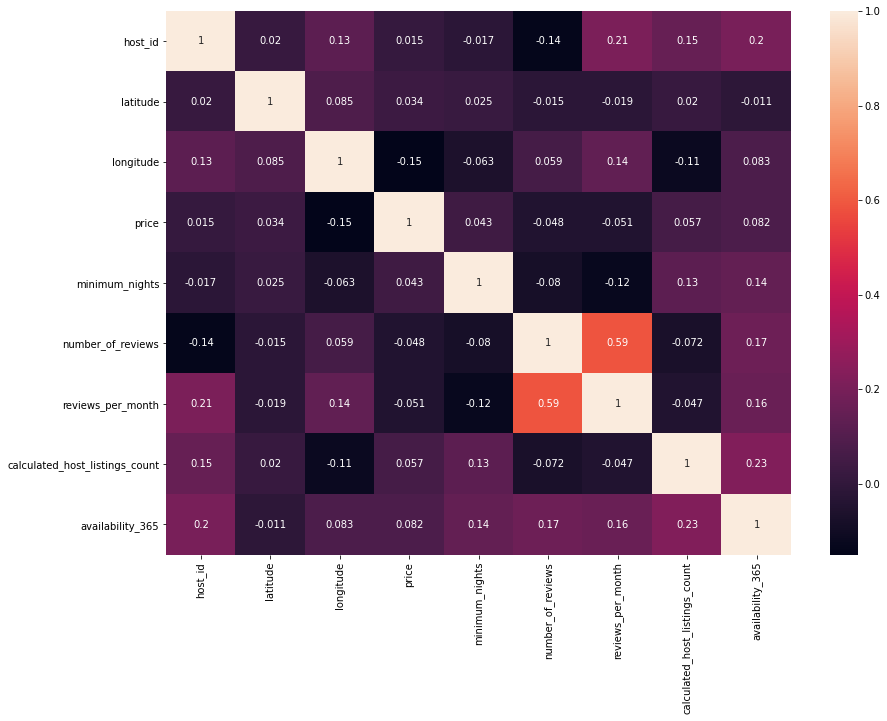

In [ ]:
# Looking for corelation 
corr=df.corr(method='pearson')
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True)

From above heat map we can clearly say that there is not close relation between columns except **number_of_reviews** and **reviews_per_month**.

After understanding and cleaning the data we will now look for our findings.

# What can we learn about different hosts and areas?

Now we will look for the top hosts with most number of listings.

In [ ]:
top_host_count=df['host_id'].value_counts().head(10)
top_host_count.reset_index()
top_host_counts_df=pd.DataFrame(top_host_count) #Defining a seperate dataframe.
top_host_counts_df.reset_index()
top_host_counts_df.rename(columns={'index':'host_id','host_id':'total_counts'},inplace=True) #Renaming the columns.
top_host_counts_df.reset_index(inplace=True)
top_host_counts_df.rename(columns={'index':'host_id'},inplace=True)
top_host_counts_df

,host_id,total_counts
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,1475015,52


The highest host with **host id-219517861** having 327 listings.

In [ ]:
top_host_counts_df['host_id'][0]

219517861

Plotting the top 10 hosts with highest number of listings.

Text(0, 0.5, 'Listing count')

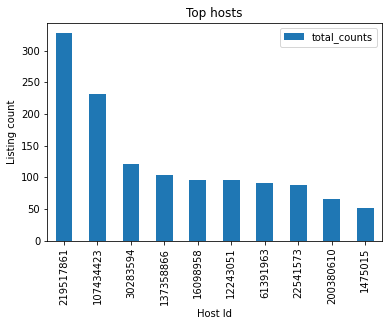

In [ ]:
#plot the top 10 hosts with highest listings
top_host_counts_df.plot.bar(x='host_id',y='total_counts',title='Top hosts')
plt.xlabel("Host Id")
plt.ylabel("Listing count")

In [ ]:
#We will define highest listed host.
highest_listed_host=df[df.calculated_host_listings_count == df.calculated_host_listings_count.max()]
highest_listed_host

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
38293,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,0.00,327,309
38294,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,0.73,327,219
38588,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,0.60,327,159
39769,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,1.86,327,91
39770,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,0.00,327,339
47692,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,0.00,327,342
47693,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,0.00,327,347
47814,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,0.00,327,327


In [ ]:
highest_listed_host['neighbourhood_group'].value_counts()

Manhattan    327
Name: neighbourhood_group, dtype: int64

From this exploration we can say that the host named **Sonder(NYC)** with highest number of listing is listed only in **Manhattan**

**We will now explore areas**

In [ ]:
top_neighbourhood_group=df['neighbourhood_group'].value_counts().reset_index()
top_neighbourhood_group_df=pd.DataFrame(top_neighbourhood_group)

top_neighbourhood_group_df.rename(columns={'index':'Neighbourhood_group','neighbourhood_group':'Total_hostings'},inplace=True)
top_neighbourhood_group_df

,Neighbourhood_group,Total_hostings
0,Manhattan,21660
1,Brooklyn,20095
2,Queens,5666
3,Bronx,1090
4,Staten Island,373


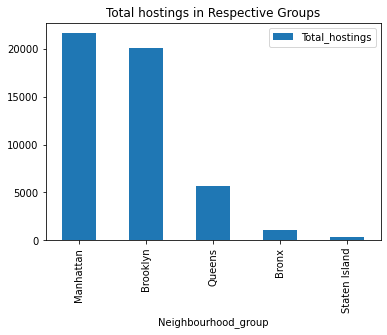

In [ ]:
top_neighbourhood_group_df.plot.bar(x='Neighbourhood_group',y='Total_hostings', title="Total hostings in Respective Groups")

By plotting this we got that **Manhattan** group is highest number of hosts listed (21660) followed by **Brooklyn** which has second highest(20095). While Staten Island is the lowest number of listing (only 373)

In [ ]:
# Total listings in top two groups(%)
(top_neighbourhood_group_df.Total_hostings[0:2].sum())*100/top_neighbourhood_group_df.Total_hostings.sum()

85.41649619507405

Top 2 groups **Manhattan** & **Brooklyn** together have 
**85%** of total host listings.




We will now explore **Neighbourhoods**

In [ ]:
# Defining a new dataframe for neighbourhoods.
neighbourhood_rel=pd.DataFrame(df['neighbourhood'].value_counts().head(15).reset_index())
neighbourhood_rel.rename(columns={'index':'Neighbourhood','neighbourhood':'listing_counts'},inplace=True)
neighbourhood_rel

,Neighbourhood,listing_counts
0,Williamsburg,3919
1,Bedford-Stuyvesant,3710
2,Harlem,2658
3,Bushwick,2462
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


**Williamsburg** with	**3919** listings is the neighbourhood with highest listings in entire Newyork

In [ ]:
# Getting the percentage of listing in top 15 neighbourhoods in entire NewYork.
(neighbourhood_rel['listing_counts'].sum())*100/df['neighbourhood'].value_counts().sum()

58.49153097127895

Around 58% of hosts are listed in above top 15 Neighbourhoods.

#What can we learn from predictions? (ex: locations, prices, reviews, etc)

**Location**


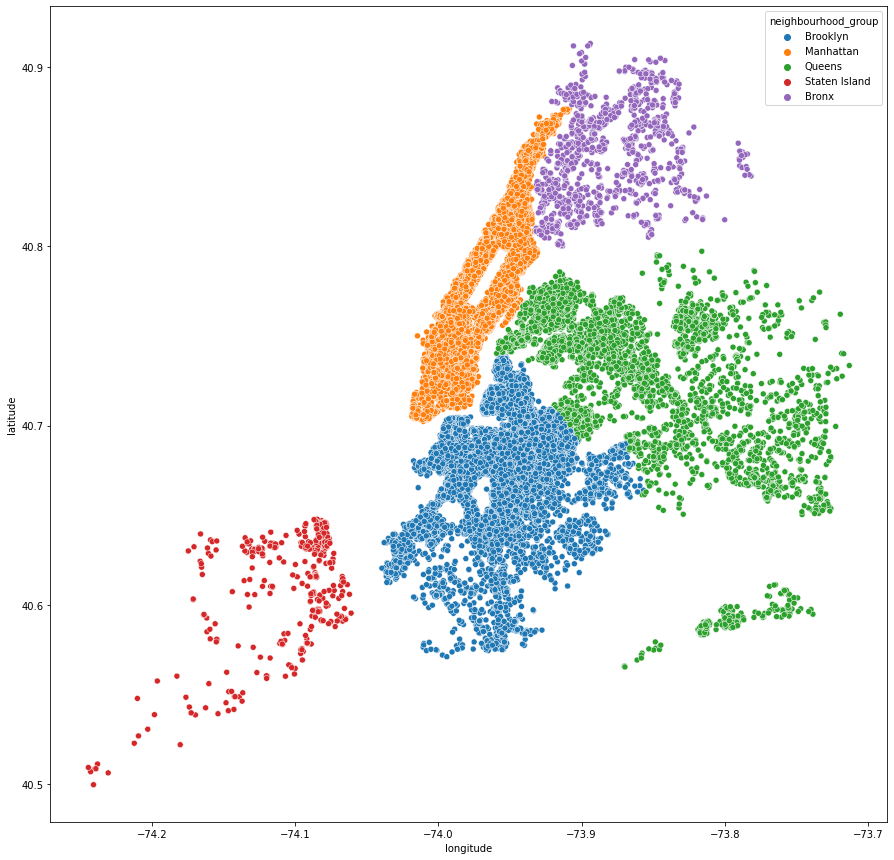

In [ ]:
# Try to explore locations on a plot using latitute and longitude
plt.figure(figsize=(15,15))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)

From the above map we can confirm that **Manhatten** and **Brooklyn** are highly densed areas with highly listed Airbnb hosts.
And we can clearly see that **Staten Island** is very scattered and less amount of hosts.

We can further say that there is a lot of density in between longitude **-74.0 to -73.9**.

**Price Exploration**


In [ ]:
# we will define a new dataset sorting the price column in descending order.
max_price=df.sort_values(by='price',axis=0,ascending=False)

Considering the price is given for minimum nights to stay, we will create a extra column which will define price per night(we will divide price column by minimum nights)

In [ ]:
# we will add a new column in 'max_price' dataframe.
max_price['price_per_night']=round(max_price['price']/max_price['minimum_nights'],2)

In [ ]:
# sorting the dataframe by 'price_per_night' column in dscending order using 'sort_values'.
top_expensive_hosts=max_price.sort_values(by='price_per_night',ascending=False).head(3)
top_expensive_hosts

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_per_night
4377,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,0.03,11,365,8000.0
29662,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,0.00,12,146,7703.0
42523,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,0.00,1,364,7500.0


Host with **host id-1177497** and named **Jessica** from **Brooklyn** group has the highest price for one single night which is **8000/Night**.

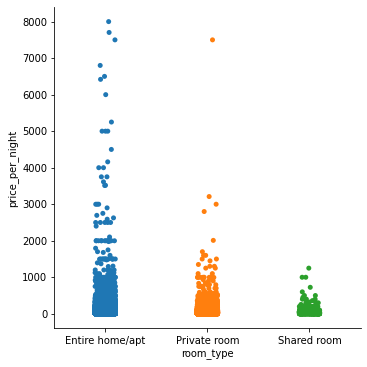

In [ ]:
# plotting scatterplot between room_type and price_per_night.
sns.catplot(x="room_type", y="price_per_night", data=max_price)

From above graph it is clearly seen that **'Entire home/apt'** is expensive than 'Private room' and 'Shared room'.
And 'Shared rooms' has price per night is very low.

<Figure size 1800x720 with 0 Axes>

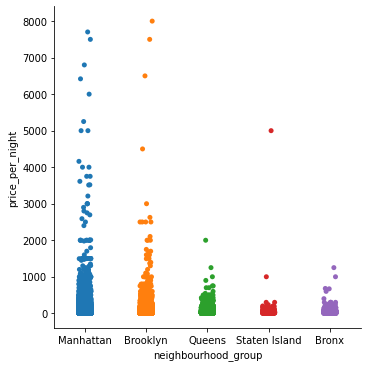

In [ ]:
#plotting scatterplot between areas and price per night
plt.figure(figsize=(25,10))
sns.catplot(x='neighbourhood_group',y='price_per_night',data=max_price)

'Manhattan' and 'Brooklyn' are contains all types of hosts by price_per_night 

**Reviews**


In [ ]:
df_reviews=max_price.sort_values(by='number_of_reviews',ascending=False).head(15)
df_reviews

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_per_night
11759,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333,47.0
2031,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293,49.0
2030,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342,49.0
2015,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339,49.0
13495,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173,47.0
10623,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163,46.0
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179,49.5
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341,48.0
4870,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269,160.0
471,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0,20.0


Host with **host id-47621202** named **Dona** from 	**Queens** got the **most number of reviews 629**.	

In [ ]:
#Finding the mean value of reviews for all neighbourhood groups.
review_analysis=df.groupby('neighbourhood_group')['number_of_reviews'].mean()

In [ ]:
review_analysis

neighbourhood_group
Bronx            25.977982
Brooklyn         24.197661
Manhattan        20.986565
Queens           27.700318
Staten Island    30.941019
Name: number_of_reviews, dtype: float64

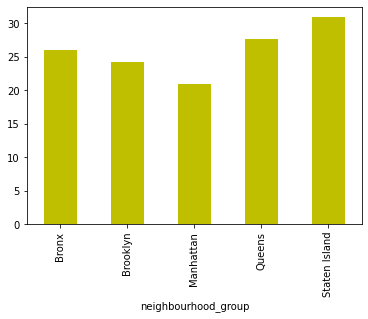

In [ ]:
review_analysis.plot(kind='bar',color='y')

In [ ]:
#Finding the total number of reviews for each neighbourhood group.
review_analysis=df.groupby('neighbourhood_group')['number_of_reviews'].sum()

In [ ]:
review_analysis

neighbourhood_group
Bronx             28316
Brooklyn         486252
Manhattan        454569
Queens           156950
Staten Island     11541
Name: number_of_reviews, dtype: int64

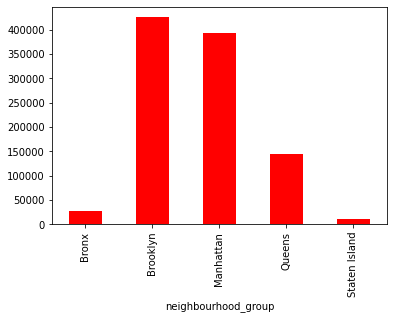

In [ ]:
review_analysis.plot(kind='bar',color='r')

We can say that **Brooklyn(486252)** has most number of reviews followed by **Manhattan(454569)** and **Staten Island** has least number of reviews **11541**.

#Which hosts are the busiest and why?

Now we will look for the top hosts with most number of listings.

In [ ]:
top_host_count=df['host_id'].value_counts().head(10)

In [ ]:
top_host_count.reset_index()

,index,host_id
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,1475015,52


In [ ]:
top_host_counts_df=pd.DataFrame(top_host_count)

In [ ]:
top_host_counts_df.reset_index()

,index,host_id
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,1475015,52


In [ ]:
top_host_counts_df.rename(columns={'index':'host_id','host_id':'total_counts'},inplace=True)

In [ ]:
 top_host_counts_df.reset_index(inplace=True)

In [ ]:
top_host_counts_df.rename(columns={'index':'host_id'},inplace=True)

In [ ]:
top_host_counts_df

,host_id,total_counts
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,1475015,52


The highest host with **host id-219517861** having 327 listings.

In [ ]:
top_host_counts_df['host_id'][0]

219517861

Text(0, 0.5, 'Listing count')

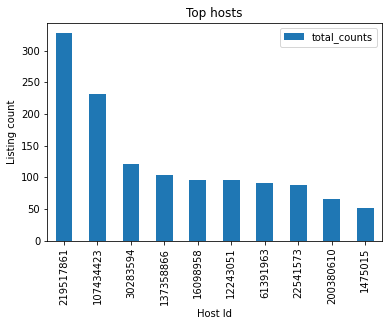

In [ ]:
#plot the top 10 hosts with highest listings
top_host_counts_df.plot.bar(x='host_id',y='total_counts',title='Top hosts')
plt.xlabel("Host Id")
plt.ylabel("Listing count")

Above 10 hosts are busiest hosts as they have highest number of listings as compared to others so this 10 hosts are busiest hosts.

#Is there any noticeable difference of traffic among different areas and what could be the reason for it?

For this we are plotting scatterplot using coordinates given. we will plot it seperately for each group so that we can spot the difference between traffic amongst them.

In [18]:
# Defining seperate dataset for each of group.
manhattan_df=df[df['neighbourhood_group']=='Manhattan']
brooklyn_df=df[df['neighbourhood_group']=='Brooklyn']
queens_df=df[df['neighbourhood_group']=='Queens']
staten_island_df=df[df['neighbourhood_group']=='Staten Island']
bronx_df=df[df['neighbourhood_group']=='Bronx']

##**Manhattan** 

Text(0.5, 1.0, 'Density of Airbnb listings-Manhattan')

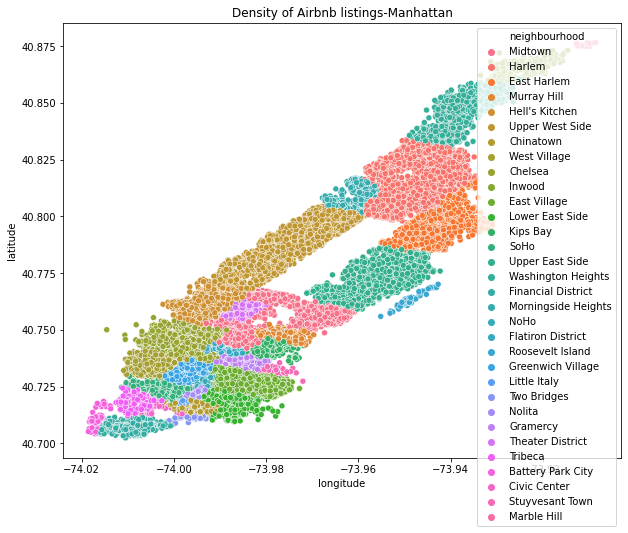

In [ ]:
# using scatterplot 
#For Manhattan
plt.figure(figsize=(10,8))

sns.scatterplot(x=manhattan_df.longitude,y=manhattan_df.latitude,hue=manhattan_df.neighbourhood)
plt.title('Density of Airbnb listings-Manhattan')

In [20]:
#Getting the highest listed neighbourhood from manhattan
manhattan_df['neighbourhood'].value_counts().head(1)

Harlem    2658
Name: neighbourhood, dtype: int64

**Herlem** has the most numbers of host listed than any other neighbourhoods in Manhattan.

## **Brooklyn**

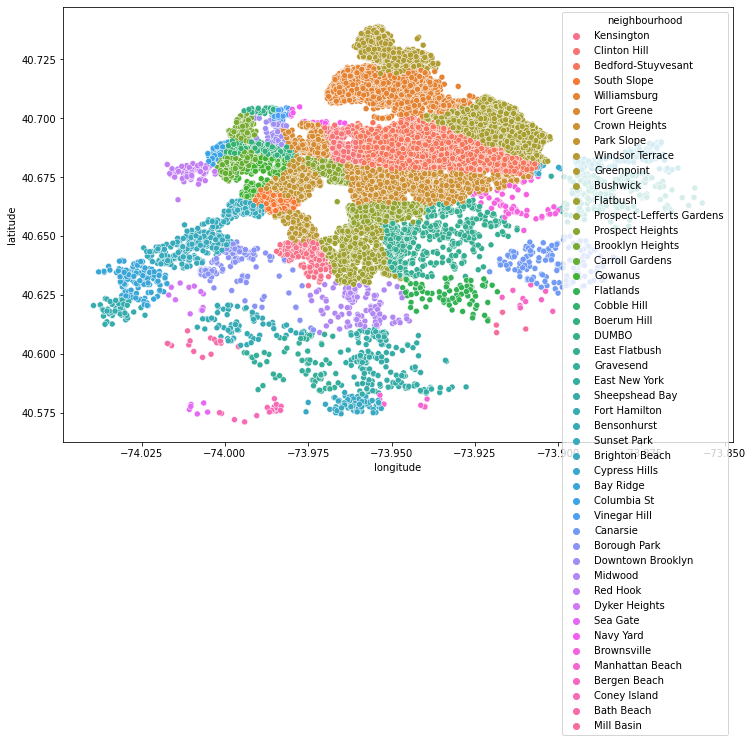

In [ ]:
# using scatterplot 
#For Brooklyn
plt.figure(figsize=(12,8))
sns.scatterplot(x=brooklyn_df.longitude,y=brooklyn_df.latitude,hue=brooklyn_df.neighbourhood)
plt.title('Density of Airbnb listings-Brooklyn')

In [21]:
#Getting the highest listed neighbourhood from Brooklyn
brooklyn_df['neighbourhood'].value_counts().head(1)

Williamsburg    3919
Name: neighbourhood, dtype: int64

**Williamsburg** has the most numbers of host listed than any other neighbourhoods in Brooklyn.

# **Queens**

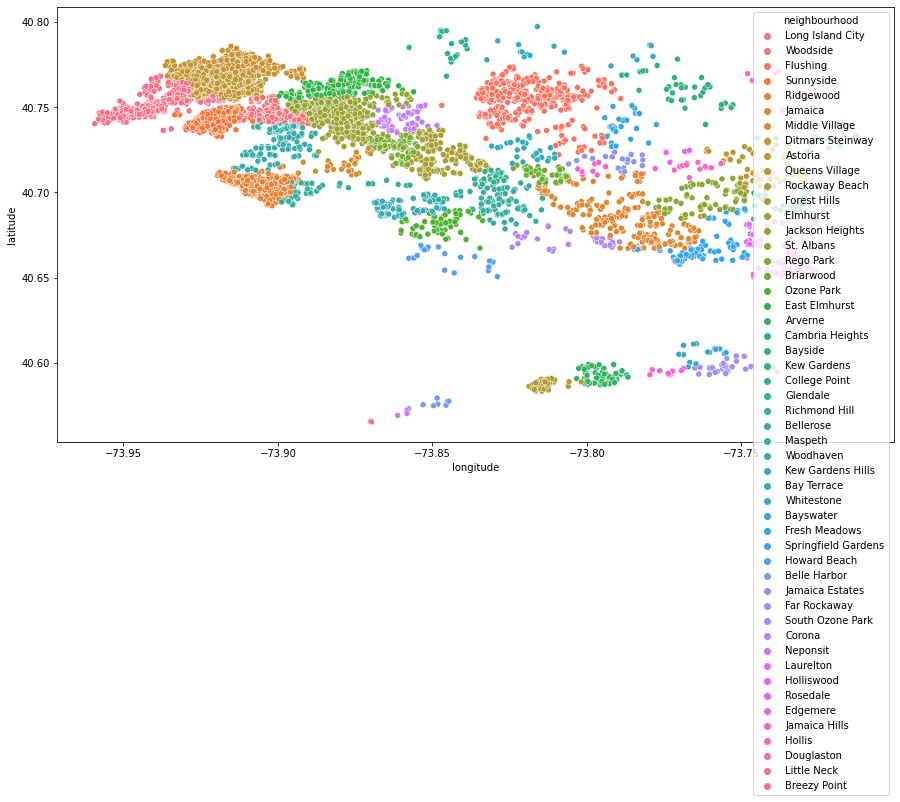

In [ ]:
# using scatterplot 
#For Queens
plt.figure(figsize=(15,8))
sns.scatterplot(x=queens_df.longitude,y=queens_df.latitude,hue=queens_df.neighbourhood)
plt.title('Density of Airbnb listings-Queens')

In [22]:
#Getting the highest listed neighbourhood from Queens
queens_df['neighbourhood'].value_counts().head(1)

Astoria    900
Name: neighbourhood, dtype: int64

**Astoria** has the most numbers of host listed than any other neighbourhoods in Queens.

# **Bronx**

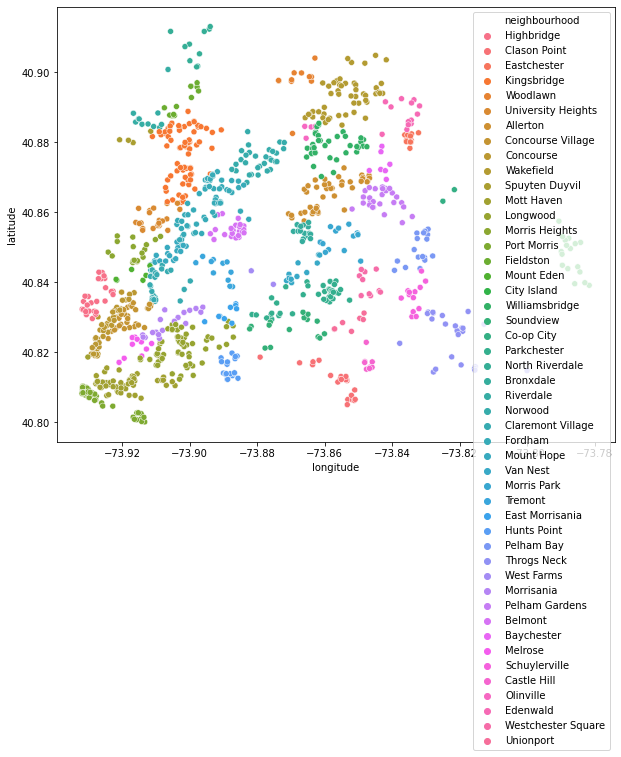

In [ ]:
# using scatterplot 
#For Bronx
plt.figure(figsize=(10,8))
sns.scatterplot(x=bronx_df.longitude,y=bronx_df.latitude,hue=bronx_df.neighbourhood)
plt.title('Density of Airbnb listings- Bronx')

In [23]:
#Getting the highest listed neighbourhood from Bronx
bronx_df['neighbourhood'].value_counts().head(1)

Kingsbridge    70
Name: neighbourhood, dtype: int64

**Kingsbridge** has the most numbers of host listed than any other neighbourhoods in Bronx.

# **Staten Island**

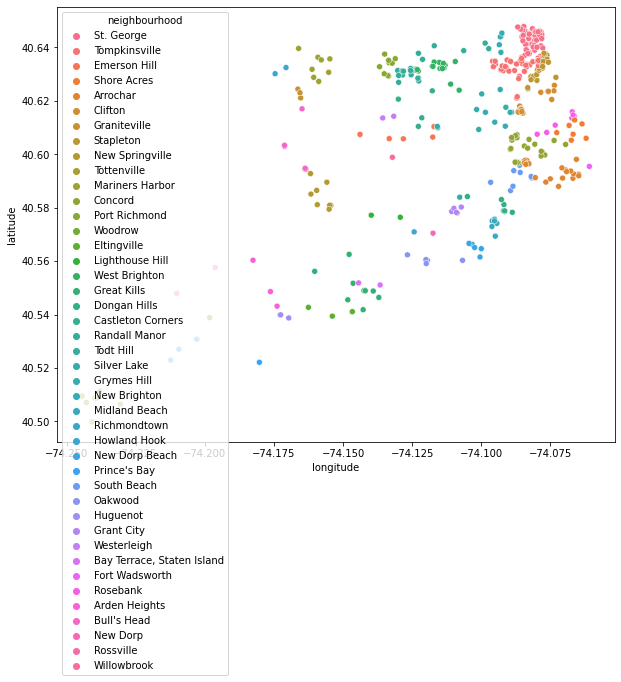

In [ ]:
# using scatterplot 
# For Staten Island
plt.figure(figsize=(10,8))
sns.scatterplot(x=staten_island_df.longitude,y=staten_island_df.latitude,hue=staten_island_df.neighbourhood)
plt.title('Density of Airbnb listings-Staten Island')

In [24]:
#Getting the highest listed neighbourhood from Staten Island
staten_island_df['neighbourhood'].value_counts().head(1)

St. George    48
Name: neighbourhood, dtype: int64

**St. George** has the most numbers of host listed than any other neighbourhoods in Staten Island.

From above scatterplots we can clearly see that **'Manhattan'** has the highest traffic followed by **'Brooklyn'**.
**Manhattan and Brooklyn** have the highest numbers of hosts listed **(around 85% of total in NYC)**. That's why both the groups have highest traffic.
Where **'Staten Island'** has extreme light amount of traffic.

**Extra experimentation**


Room_type

In [28]:
df['room_type'].value_counts().reset_index().rename(columns={'index':'Room Type','room_type':'Total Count'})

,Room Type,Total Count
0,Entire home/apt,25407
1,Private room,22319
2,Shared room,1158


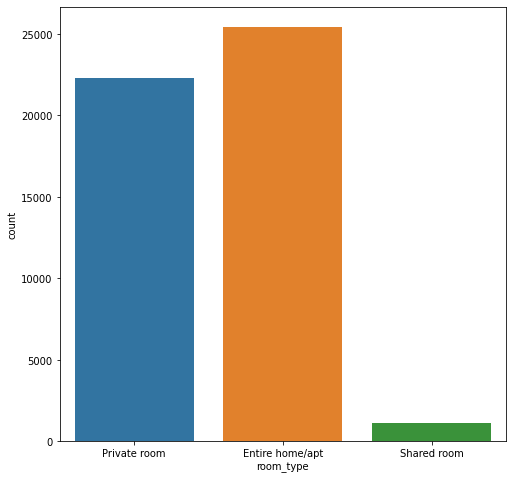

In [25]:
# counting various room types in entire NewYork.
plt.figure(figsize=(8,8))
sns.countplot(x='room_type',data=df)

Price exploration

Price comparison between all 5 groups

In [30]:
# we eliminate outliers in price column
#for this we will consider the values under 500 only

price_df=df[df['price']<501]

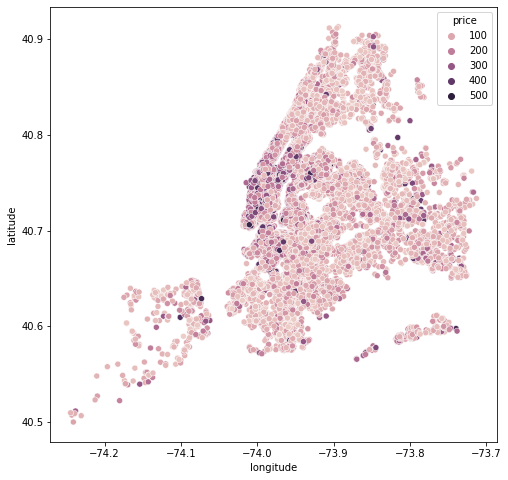

In [31]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=price_df.longitude,y=price_df.latitude,hue=price_df.price)

From above plot we can say that most of the hosts have price range upto 200.

In [32]:
#seperating for each area.
a1=price_df.loc[price_df.neighbourhood_group == 'Manhattan','price']
b1=price_df.loc[price_df.neighbourhood_group=='Brooklyn','price']
c1=price_df.loc[price_df.neighbourhood_group=='Queens','price']
d1=price_df.loc[price_df.neighbourhood_group=='Bronx','price']
e1=price_df.loc[price_df.neighbourhood_group=='Staten Island','price']

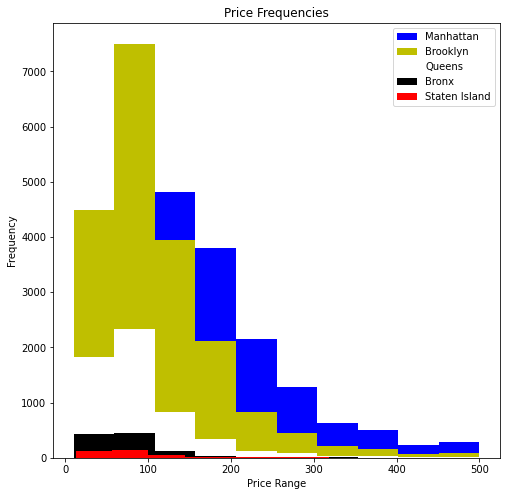

In [33]:
#plotting histogram with price range and frequencies of that price ranges.
plt.figure(figsize=(8,8))
plt.hist(a1,color='b', label='Manhattan')
plt.hist(b1,color='y', label='Brooklyn')
plt.hist(c1,color='w', label='Queens')
plt.hist(d1,color='k', label='Bronx')
plt.hist(e1,color='r', label='Staten Island')
plt.gca().set(title='Price Frequencies',xlabel='Price Range', ylabel='Frequency')
plt.legend();

Brooklyn has most numbers of host(more than 7000) listed in price range of 50-100.

In [39]:
#defining a dataframe for finding host with maximum pricing.
max_df=df[df['price'].max()==df['price']]
max_df

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9151,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0
17692,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0
29238,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83


From above table there are **3 hosts** having a maximum price of **10000** as follows- **Host id-20582832** **Named-	Kathrine** From **Queens**, **Host id- 5143901** named	**Erin** from **Brooklyn** and **Host id- 72390391** named **Jelena** from **Manhattan**.	

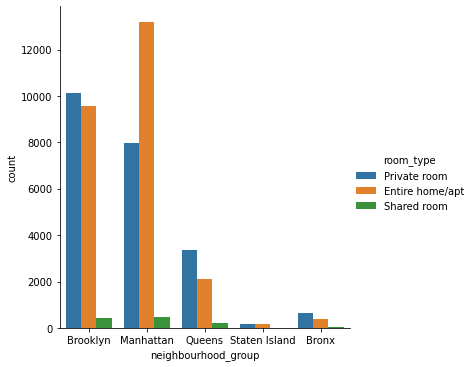

In [40]:
#plotting room counts in various areas.
room_plot=sns.catplot(x='neighbourhood_group',hue='room_type',kind="count",data=df)


Number of **Entire home/apt** types is more in **Manhattan.**

**Private rooms** are more in **Brooklyn** than any other groups.

**Shared rooms** are more in Manhattan followed by Brooklyn.

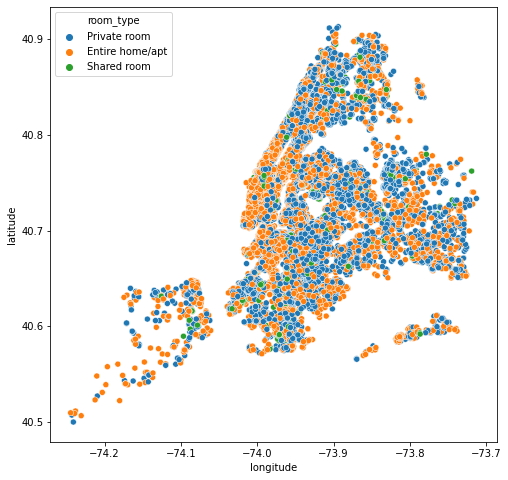

In [44]:
#plotting room types on map of NewYork
plt.figure(figsize=(8,8))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.room_type)

We can say that **south of Manhattan** and **small part at north of Broolkyn** has dominance of room type of **Entire home/apt**.




# **Conclusion**

### ***Room Type***

We can say that **south of Manhattan** and **small part at north of Broolkyn** has dominance of room type of **Entire home/apt**.

Number of **Entire home/apt** types is more in **Manhattan.**

**Private rooms** are more in **Brooklyn** than any other groups.

**Shared rooms** are more in Manhattan followed by Brooklyn.

### ***Price Analysis***




Most of the hosts have price range **upto 200** in enitre New York.


**'Entire home/apt'** is expensive than 'Private room' and 'Shared room'.
And 'Shared rooms' has price per night is very low.

### ***Areas***

By plotting this we got that **Manhattan** group is highest number of hosts listed (21660) followed by **Brooklyn** which has second highest(20095). While Staten Island is the lowest number of listing (only 373).


Top 2 groups **Manhattan** & **Brooklyn** together have 
**85%** of total host listings.



**Williamsburg** with	**3919** listings is the neighbourhood with highest listings in entire Newyork

From above scatterplots we can clearly see that **'Manhattan'** has the highest traffic followed by **'Brooklyn'**.
**Manhattan and Brooklyn** have the highest numbers of hosts listed **(around 85% of total in NYC)**. That's why both the groups have highest traffic.
Where **'Staten Island'** has extreme light amount of traffic.

### ***Different Hosts***


From this exploration we can say that the host named **Sonder(NYC)** with **host id-219517861** having 327 listings which is highest number of listings by a any host in entire **New York**.


Host with **host id-47621202** named **Dona** from 	**Queens** got the **most number of reviews 629**.	


Host with **host id-1177497** and named **Jessica** from **Brooklyn** group has the highest price for one single night which is **8000/Night** and is highest in entire New York by price per night.

There are **3 hosts** having a maximum price of **10000** as follows- **Host id-20582832** **Named-	Kathrine** From **Queens**, **Host id- 5143901** named	**Erin** from **Brooklyn** and **Host id- 72390391** named **Jelena** from **Manhattan**.